In [ ]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
#load data from csv

fandango = pd.read_csv('.\\06-Capstone-Project\\fandango_scrape.csv')

In [96]:
#check the head of the data frame

fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [97]:
#check the data types and structure

fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [98]:
#basic EDA

fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

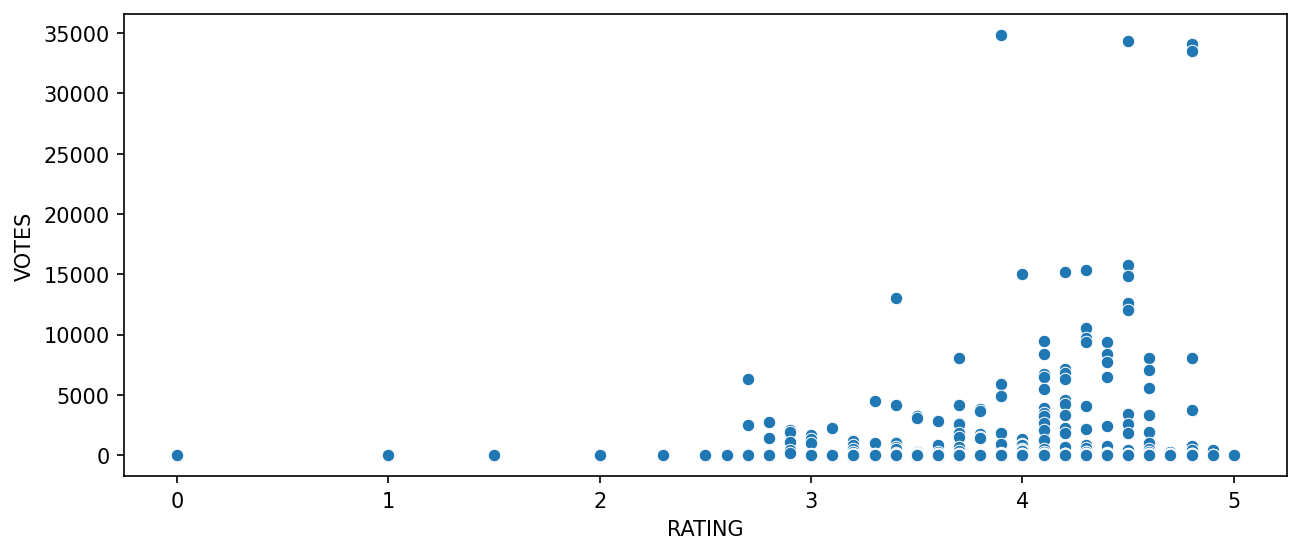

In [99]:
#visualize with scatterplot

plt.figure(figsize = (10,4), dpi = 150)
sns.scatterplot(data = fandango, y = 'VOTES', x = 'RATING')

In [100]:
##correlation between numeric variables

fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [101]:
#just for fun do some data cleaning like getting the year from the movie name variable
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))

In [102]:
#changing the type to numeric, so the plotting can be ordered in time

fandango['YEAR'] = pd.to_numeric(fandango['YEAR'])

In [103]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

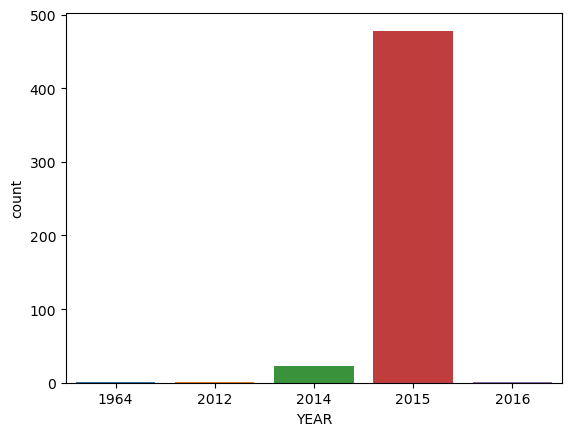

In [104]:
#visualizing the year data

sns.countplot(data = fandango, x = 'YEAR')

In [105]:
#checking the most voted movies in the database

fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [106]:
#counting the movies with 0 votes

len(fandango[fandango['VOTES'] == 0])

69

In [107]:
#extracting the reviewed movies from the initial dataframe

fan_reviewed = fandango[fandango['VOTES'] > 0]

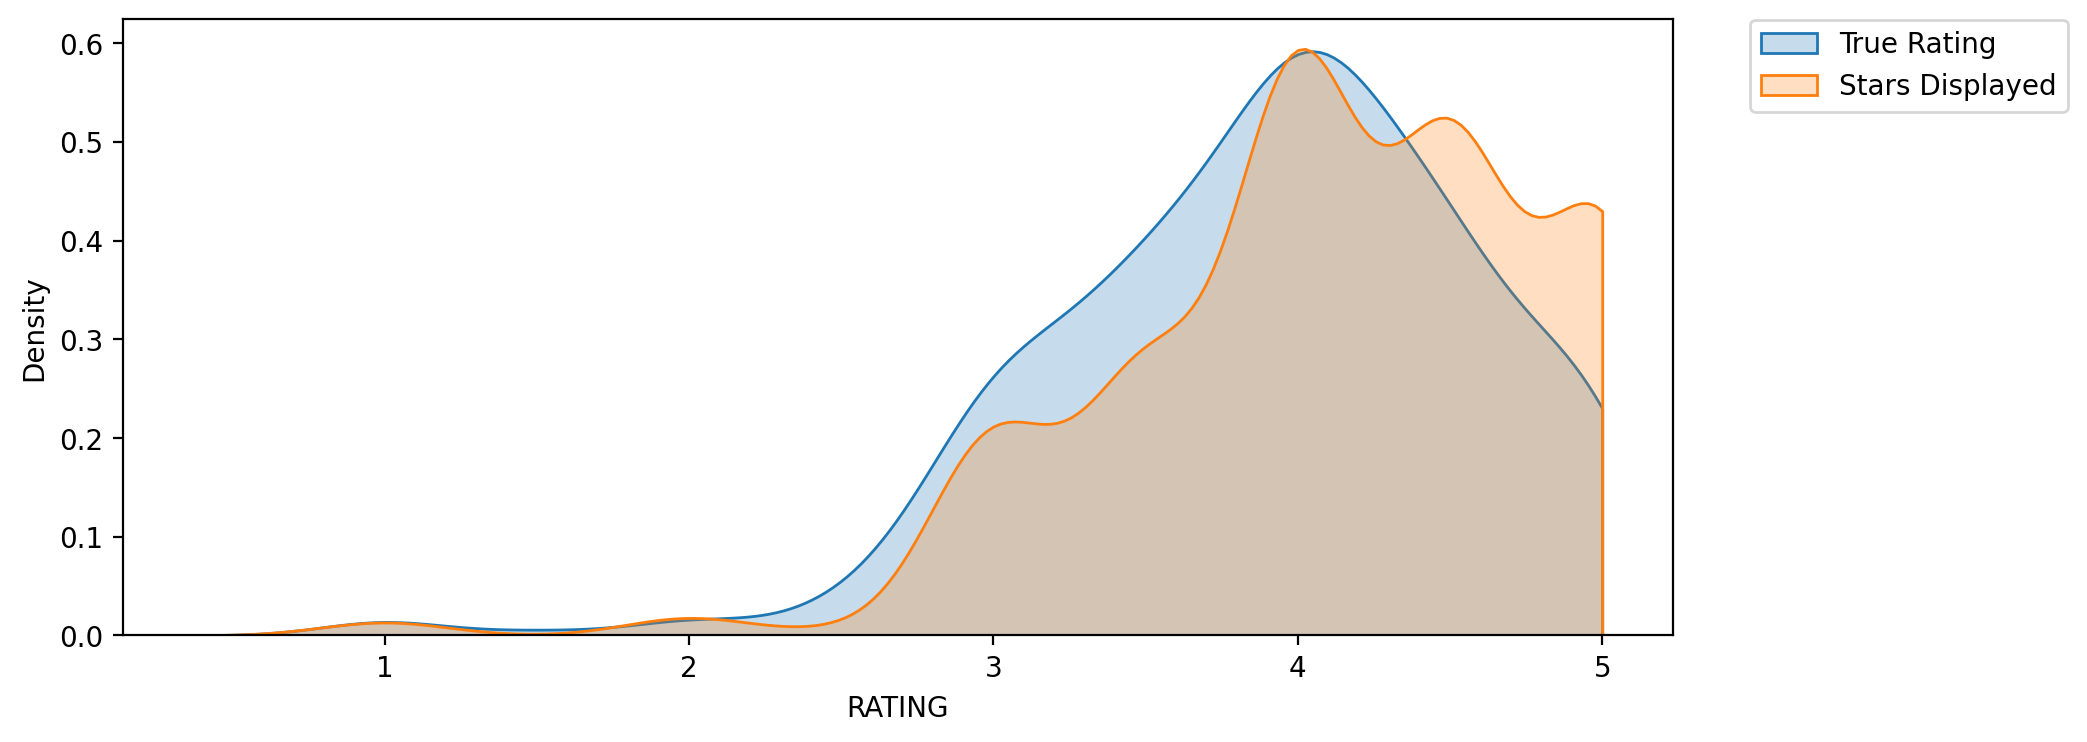

In [108]:
#visualizing the difference between the true rating and the stars displayed on the website

plt.figure(figsize = (10,4), dpi = 200)
sns.kdeplot(data = fan_reviewed, x = 'RATING', clip = [0,5], fill = True, label = 'True Rating')
sns.kdeplot(data = fan_reviewed, x = 'STARS', clip = [0,5], fill = True, label = 'Stars Displayed')

plt.legend(loc = (1.05, 0.85))

In [109]:
#new column which is based on the difference between the stars and rating

fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']

C:\Users\Kecskeméti Tamás\AppData\Local\Temp\ipykernel_6248\1435696898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']


In [110]:
## rounding up to 2 decimals

fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

C:\Users\Kecskeméti Tamás\AppData\Local\Temp\ipykernel_6248\1229596765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

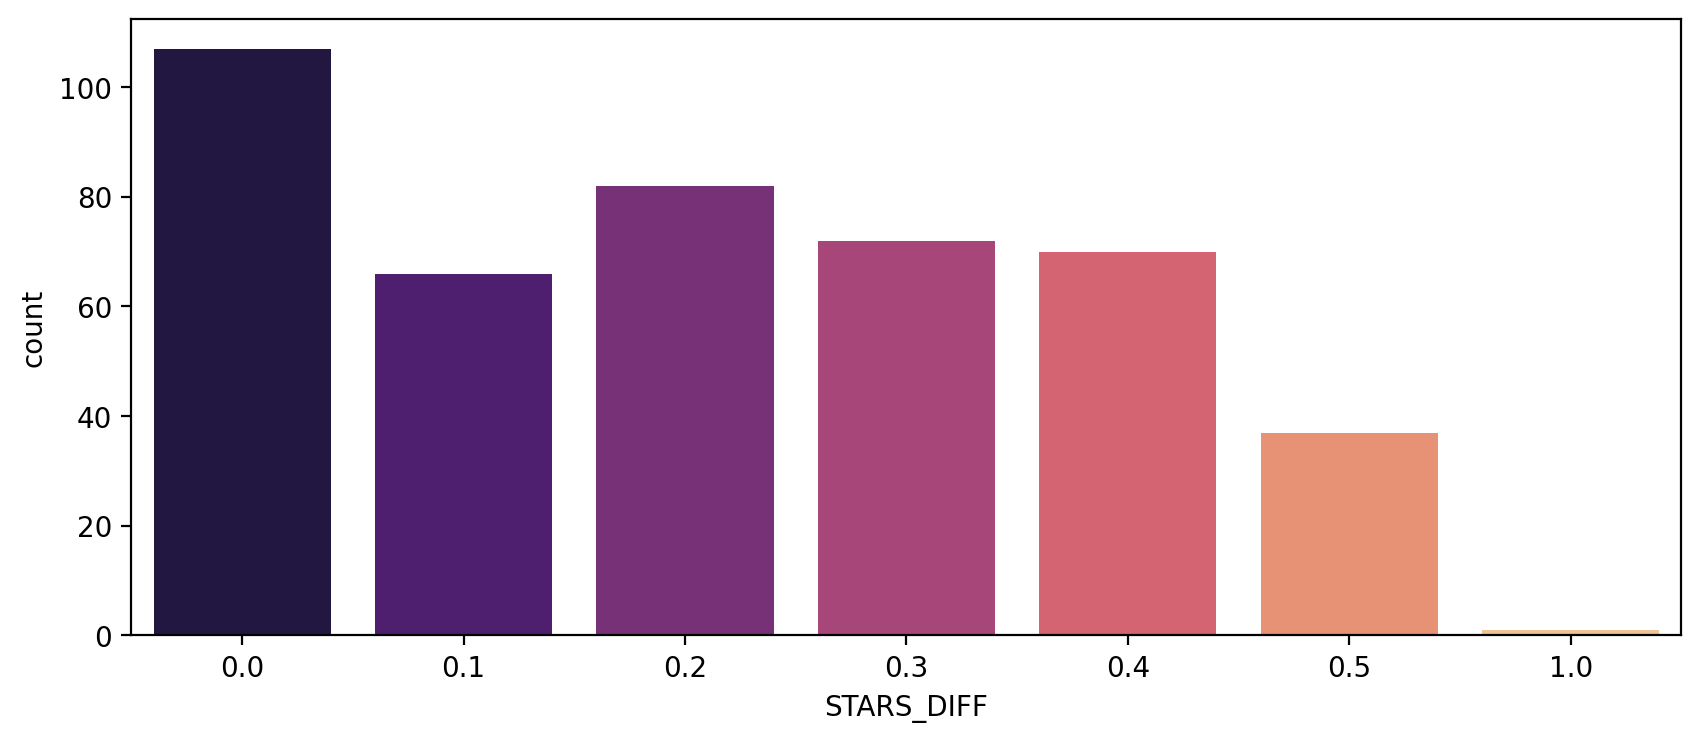

In [111]:
##nice visualization of the stars difference, which is a right skewed distribution

plt.figure(figsize = (10,4), dpi = 200)
sns.countplot(data = fan_reviewed, x = 'STARS_DIFF', palette = 'magma')

In [112]:
#the extreme example of 1 star difference between the true and the displayed rating

fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [113]:
#going forward to the other databases (RottenTomatoes, Metacritic and IMDB)

all_sites = pd.read_csv('.\\06-Capstone-Project\\all_sites_scores.csv')

In [114]:
#checking the dataframe

all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [115]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [116]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

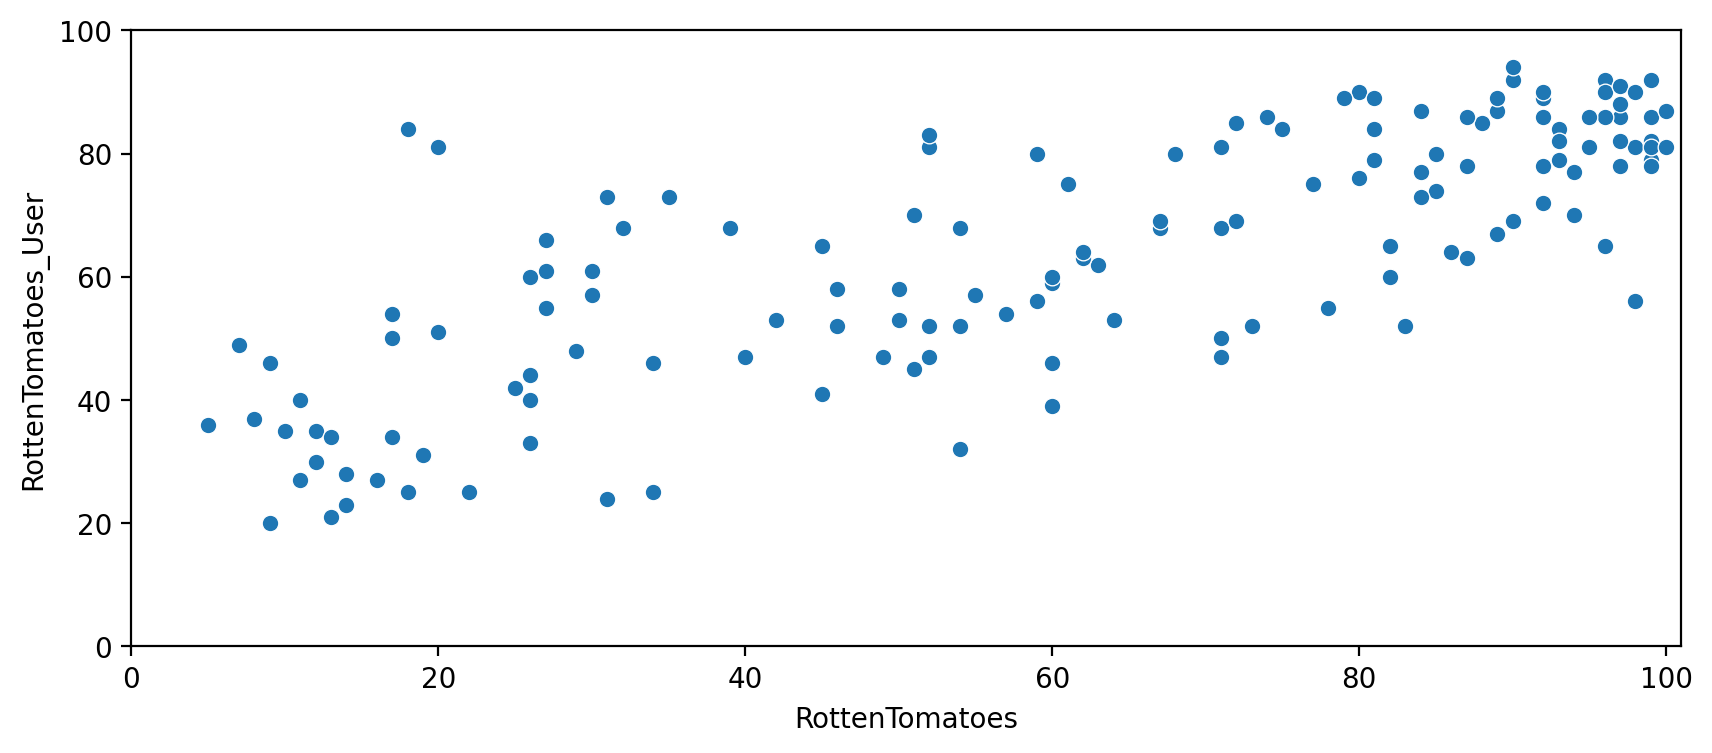

In [117]:
#checking and visualizing the RottanTomatoes first, this looks like a nice linear regression

plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User')
plt.xlim(0,101)
plt.ylim(0,100)

In [118]:
#doing the same work like on the Fandango data

all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [119]:
#as this is based on a 0-100 range, there is a bigger difference in absolute value

all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

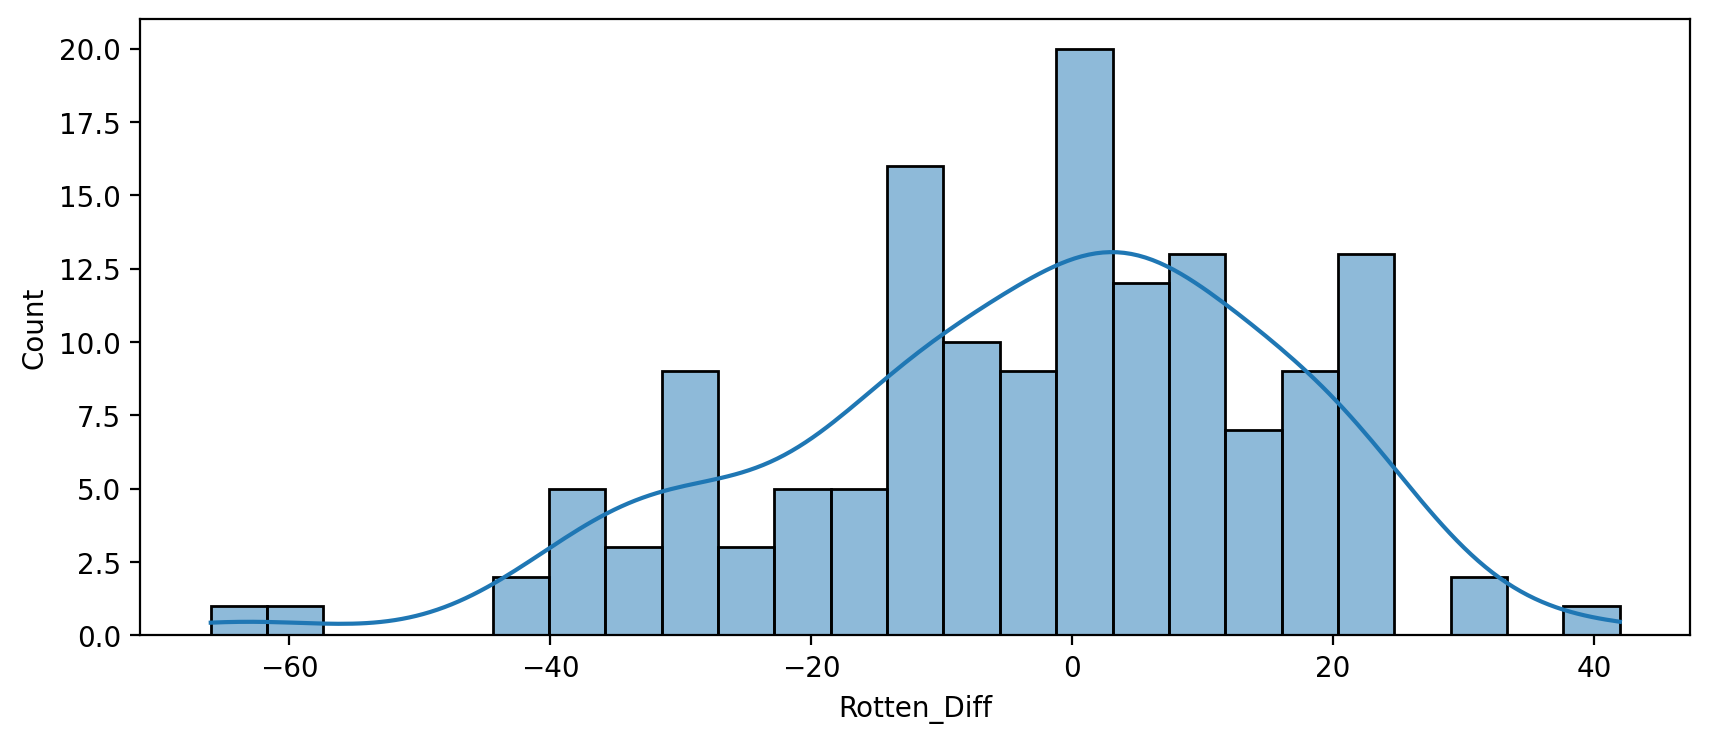

In [120]:
#visualizing the difference, but it looks like a normal distribution

plt.figure(figsize = (10,4), dpi = 200)
sns.histplot(data = all_sites, x = 'Rotten_Diff', kde = True, bins = 25)

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

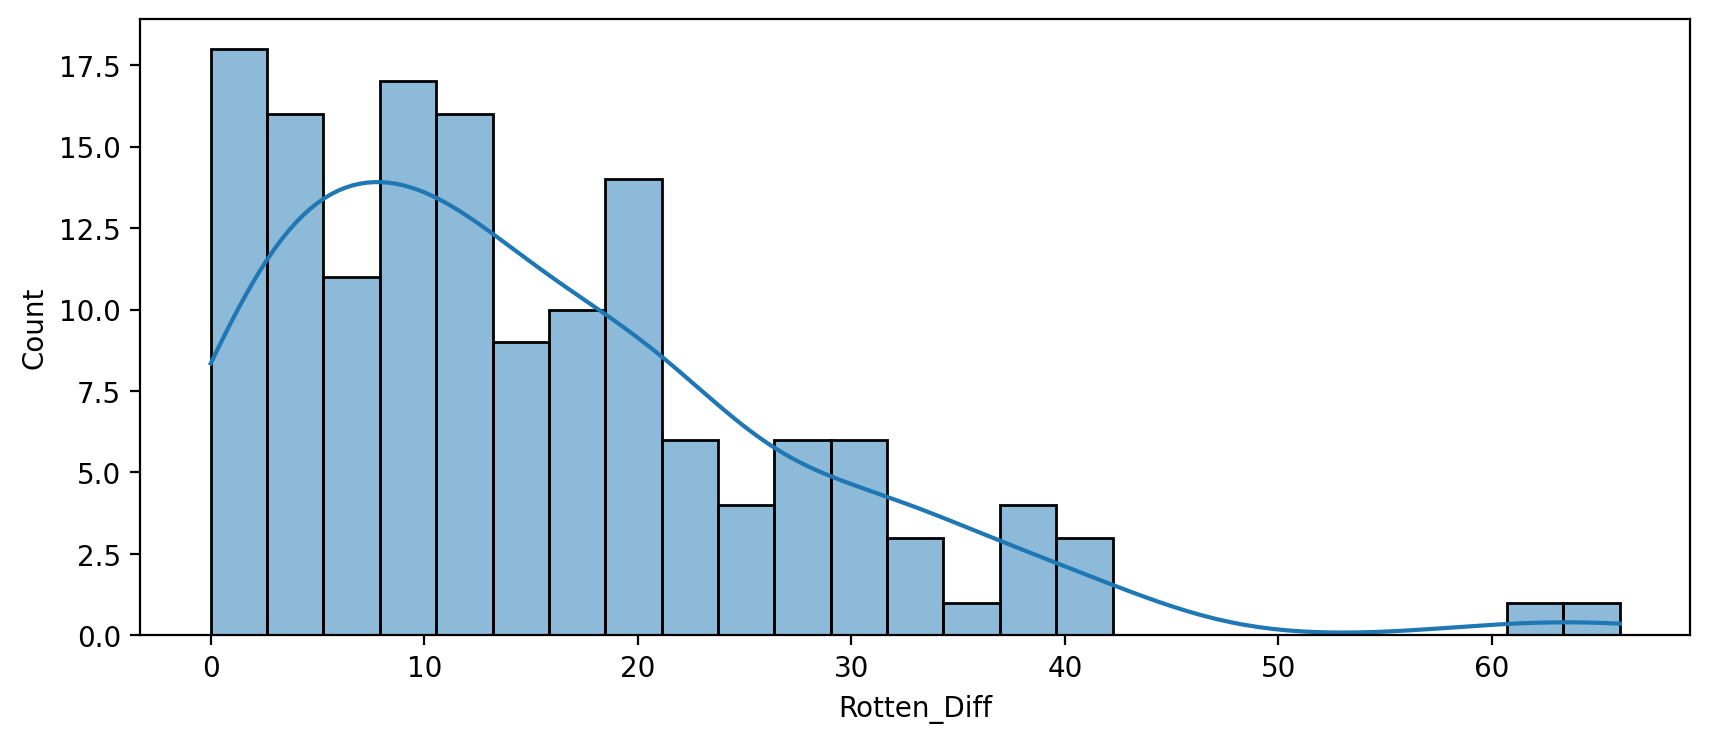

In [121]:
#if the absolute value is checked, then it is a right skewed, so it seems right

plt.figure(figsize = (10,4), dpi = 200)
sns.histplot(data = all_sites, x = all_sites['Rotten_Diff'].apply(abs), kde = True, bins = 25)

In [122]:
#the top 5 smallest difference between the users and critics on RottenTomatoes

all_sites.nsmallest(5, 'Rotten_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [123]:
#the top 5 largest difference between the users and critics on RottenTomatoes

all_sites.nlargest(5, 'Rotten_Diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

(0.0, 10.0)

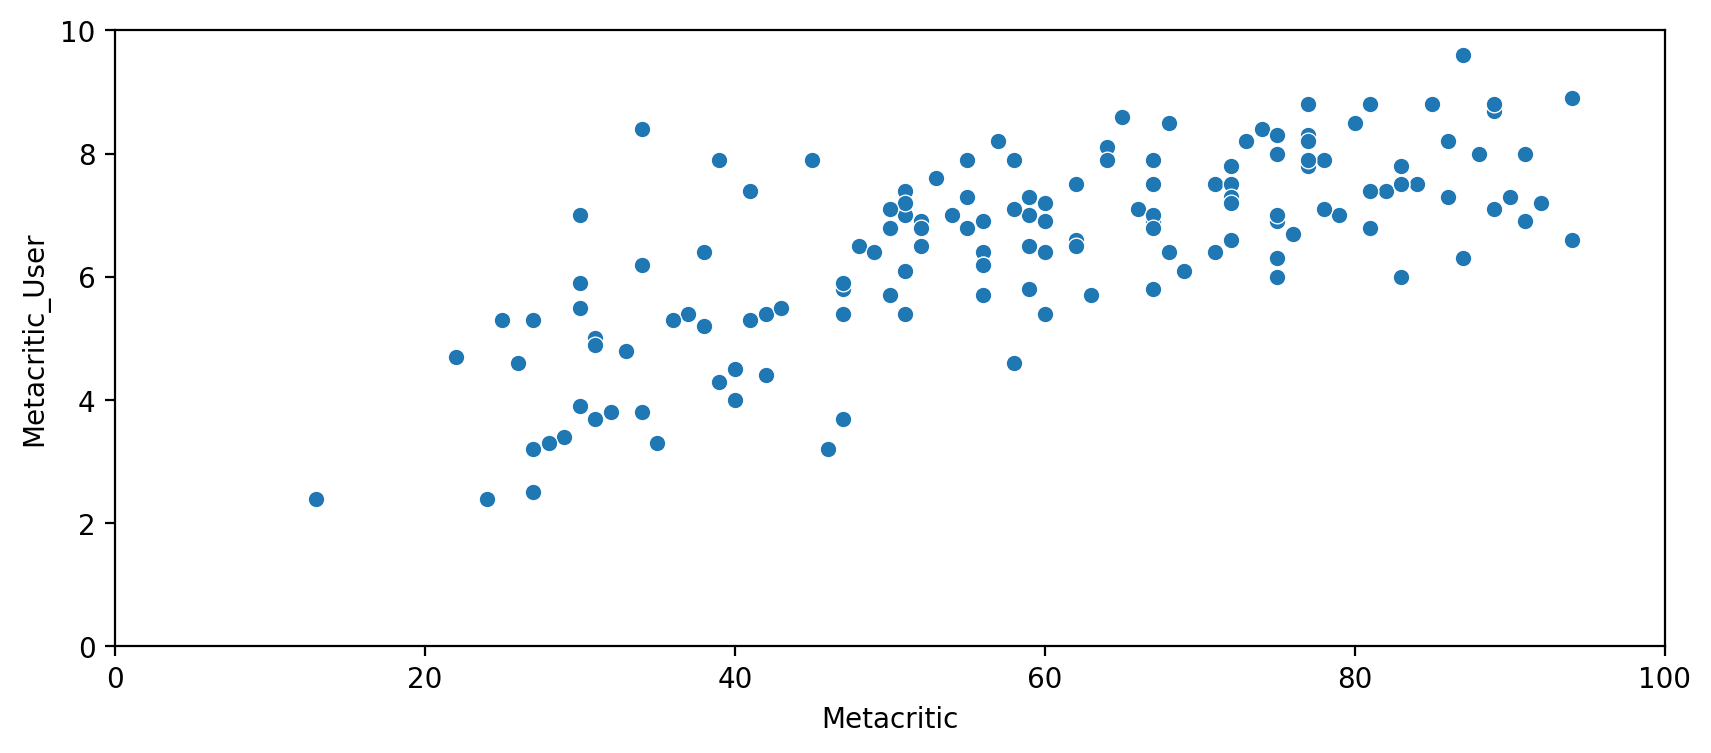

In [124]:
#going forward to the Metacritic site

plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = all_sites, x = 'Metacritic', y = 'Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

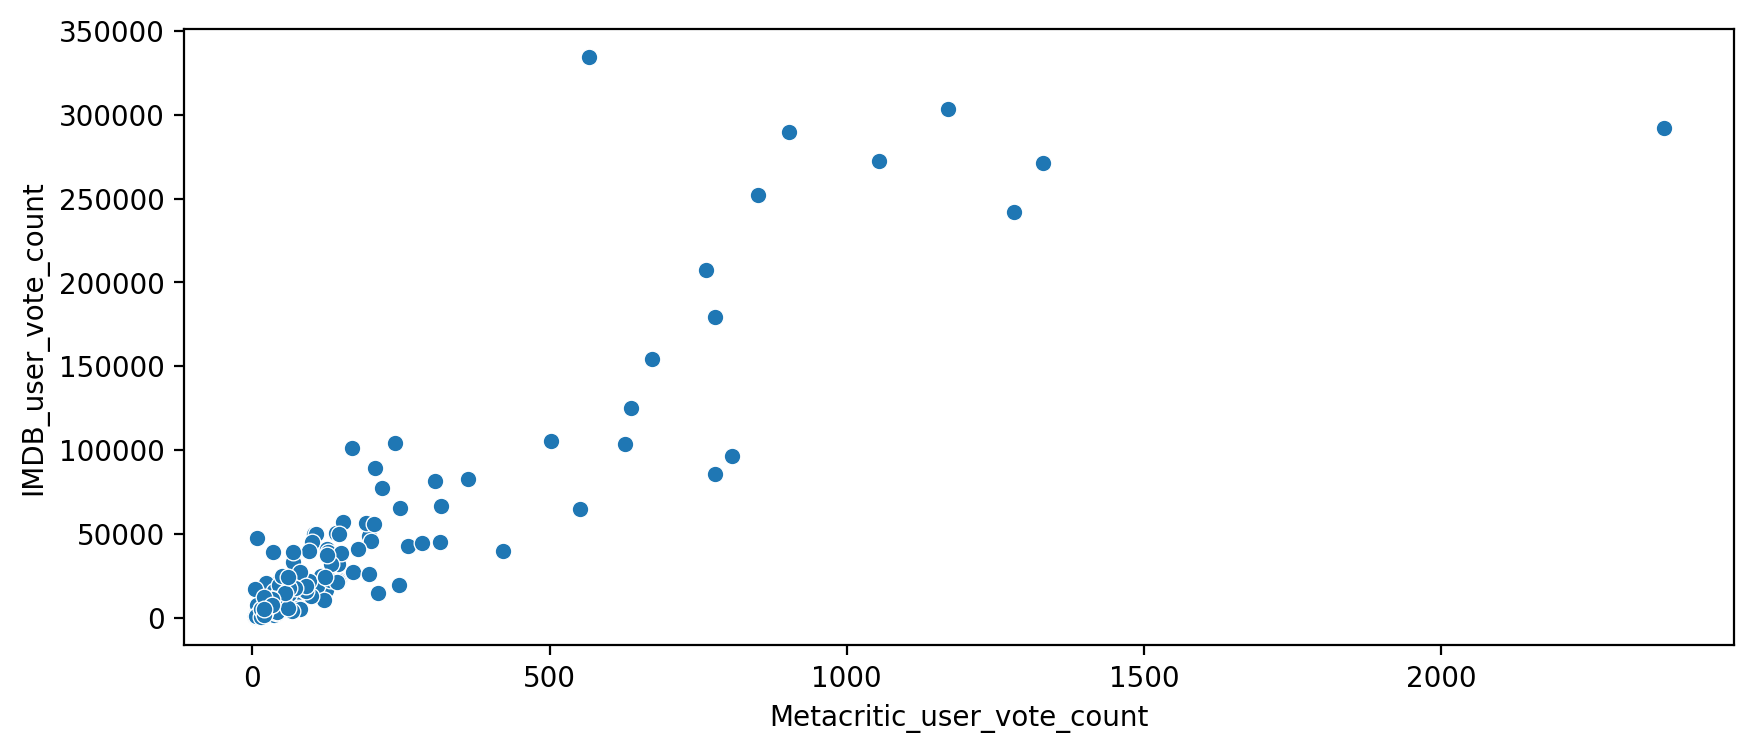

In [125]:
#visualizing the difference between the user vote count of Metacritic and IMDB

plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = all_sites, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count')

In [126]:
#checking the extreme value of IMDB user vote count

all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [127]:
#checking the extrem value of Metacritic user vote count

all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [128]:
#merging the two dataframes (Fandango and the other sites)

df = pd.merge(fandango, all_sites, on = 'FILM', how = 'inner')

In [129]:
df.sample(10)

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
87,Unfinished Business (2015),3.5,3.2,821,2015,11,27,32,3.8,5.4,39,14346,-16
85,Shaun the Sheep Movie (2015),4.5,4.0,896,2015,99,82,81,8.8,7.4,62,12227,17
24,Annie (2014),4.5,4.2,6835,2014,27,61,33,4.8,5.2,108,19222,-34
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
92,Monkey Kingdom (2015),4.5,4.2,701,2015,94,77,72,7.5,7.3,15,883,17
14,Unbroken (2014),4.5,4.1,9443,2014,51,70,59,6.5,7.2,218,77518,-19
113,Infinitely Polar Bear (2015),4.0,3.9,124,2015,80,76,64,7.9,7.2,8,1062,4
41,Vacation (2015),4.0,3.8,3815,2015,27,55,34,6.2,6.3,72,8179,-28
101,The Water Diviner (2015),4.5,4.0,397,2015,63,62,50,6.8,7.2,34,39373,1
94,American Ultra (2015),4.0,3.7,638,2015,46,52,50,6.8,6.5,42,3017,-6


In [132]:
#the data has to be normalized because there is difference in the rating ranges, this is the hardest part in  
#domain knowledge

df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

In [133]:
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [134]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [135]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [137]:
#passing the normalized values to a new dataframe

norm_scores = df[['STARS', 'RATING','RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [138]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [149]:
#a function has to be made, so the legend can be moved, otherwise an error will occur due to the nature of kdeplot

def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

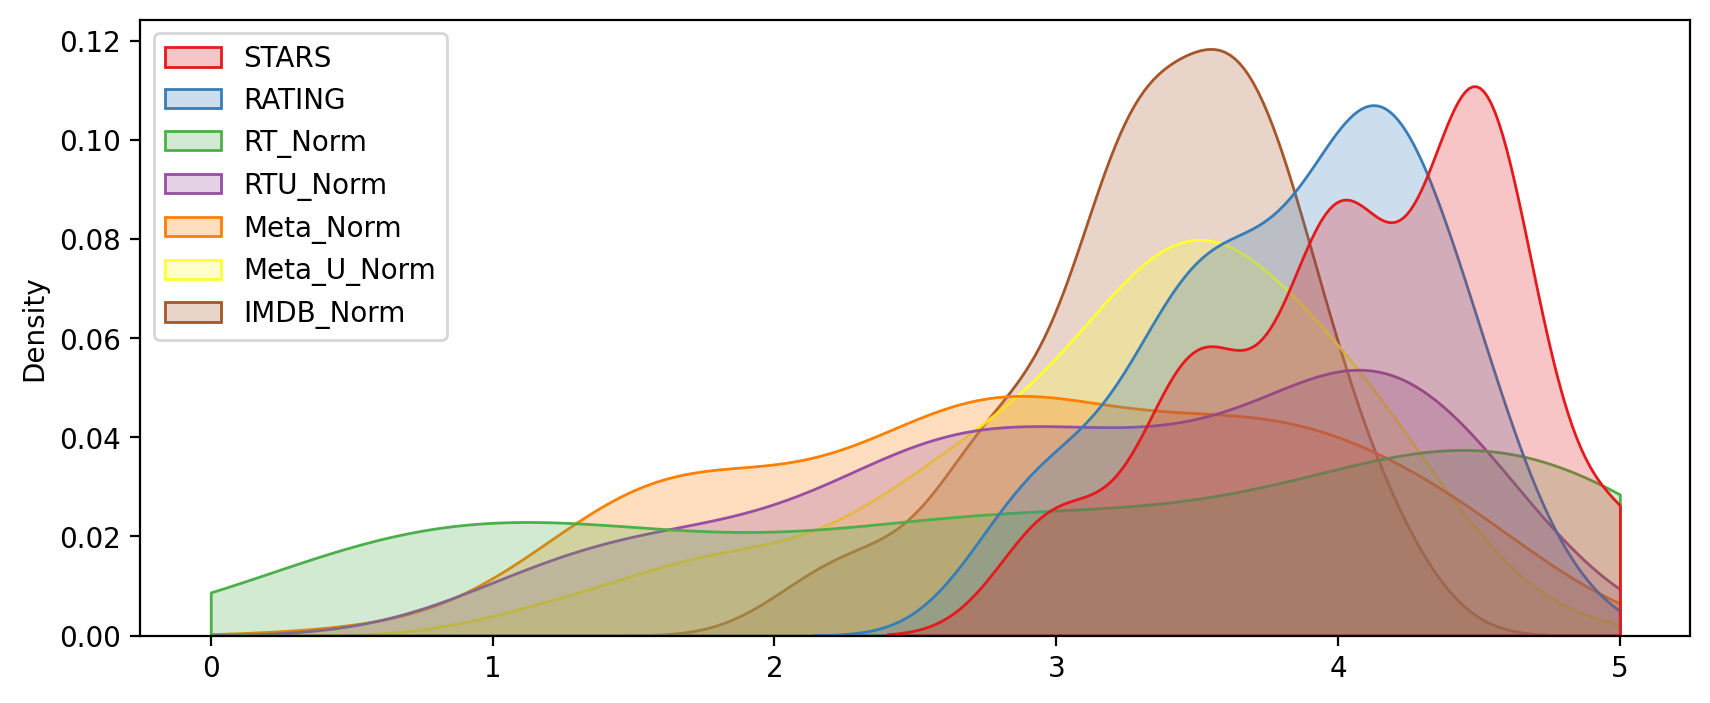

In [151]:
#visualizing the density of normalized values

fig,ax = plt.subplots(figsize = (10,4), dpi = 200)
sns.kdeplot(data = norm_scores, clip = [0,5], shade = True, palette = 'Set1')
move_legend(ax, "upper left")

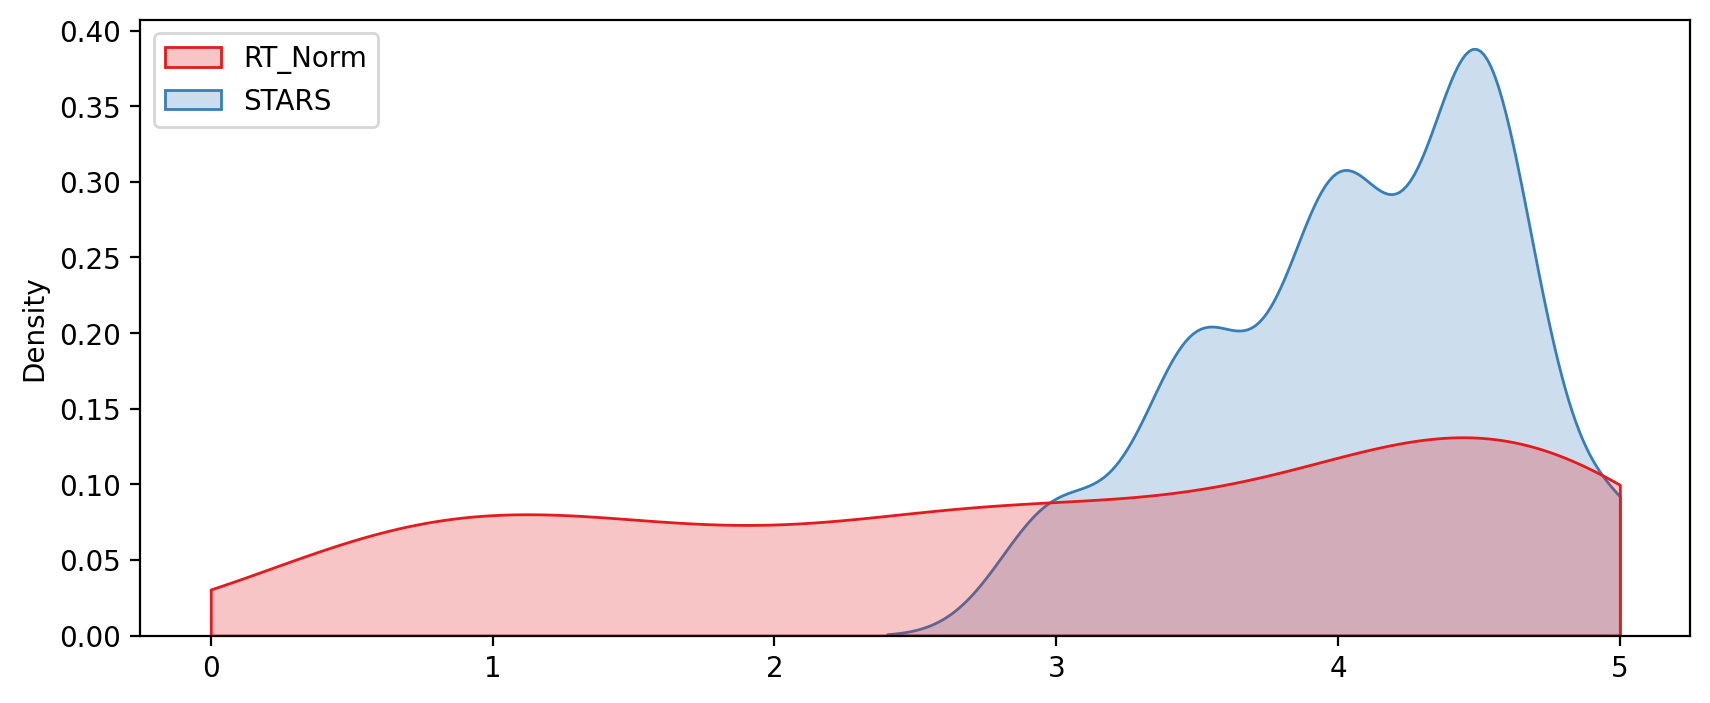

In [152]:
#the two extreme value is the critics' rating of RottenTomatoes and the STARS of Fandango

fig,ax = plt.subplots(figsize = (10,4), dpi = 200)
sns.kdeplot(data = norm_scores[['RT_Norm','STARS']], clip = [0,5], shade = True, palette = 'Set1')
move_legend(ax, "upper left")

<AxesSubplot:ylabel='Count'>

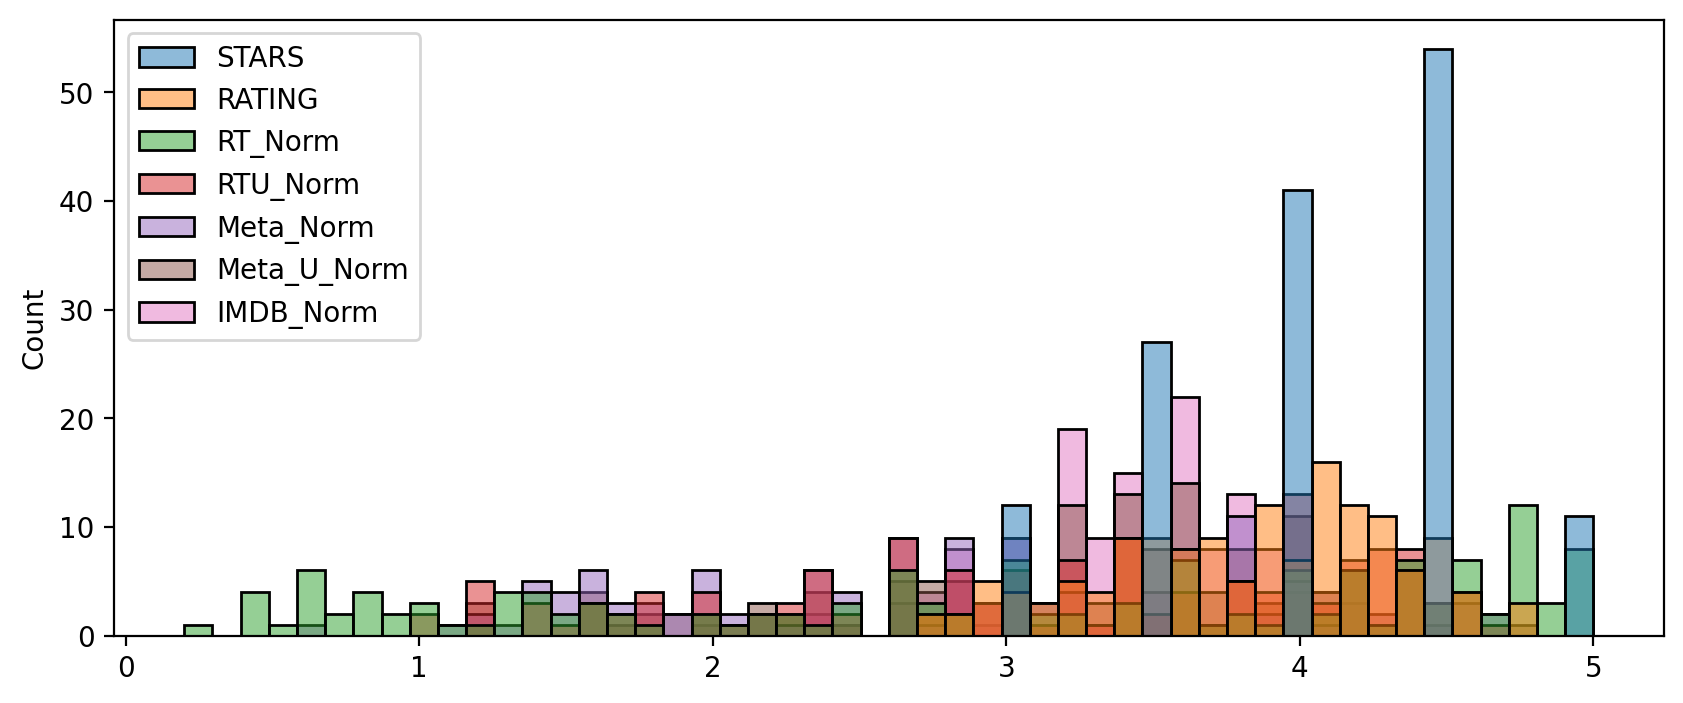

In [156]:
#another visualization of the same problem

fig,ax = plt.subplots(figsize = (10,4), dpi = 200)
sns.histplot(data = norm_scores, bins = 50)

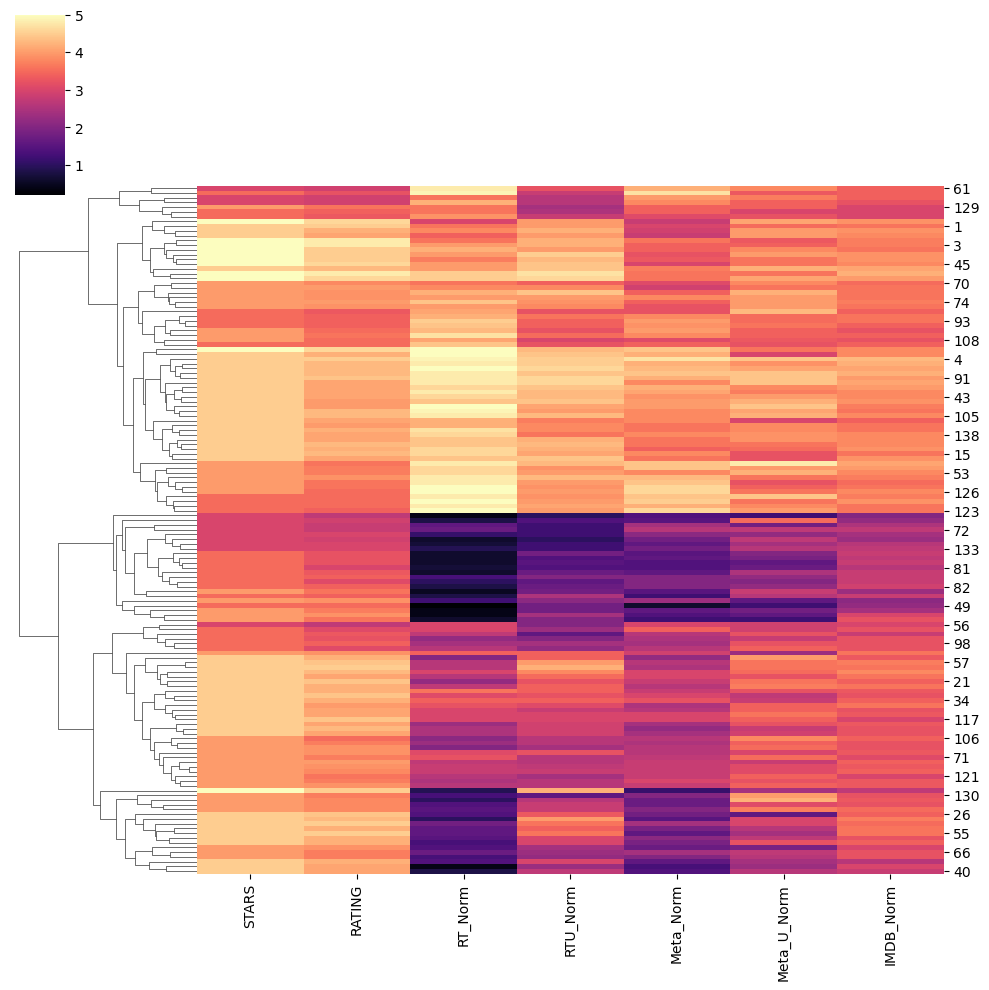

In [154]:
#a cluster map shows another perspective

sns.clustermap(data = norm_scores, cmap = 'magma', col_cluster = False)

In [159]:
#passing the normalized movie ratings to a new dataframe

norm_films = df[['FILM','STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm']]

In [161]:
#filtering down to the worst films

worst_films = norm_films.nsmallest(10,'RT_Norm')

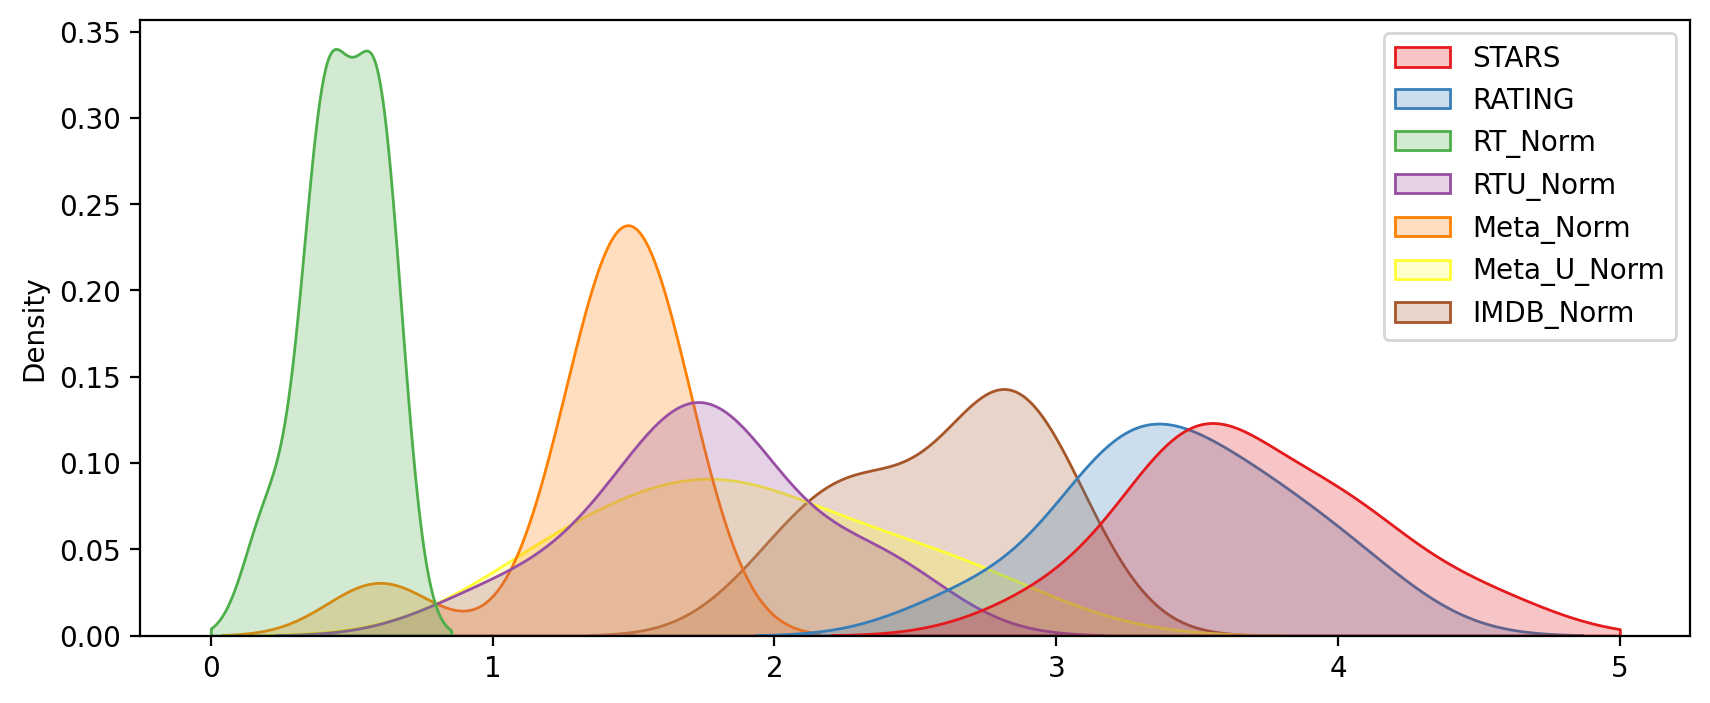

In [163]:
#visualizing the worst films

fig,ax = plt.subplots(figsize = (10,4), dpi = 200)
sns.kdeplot(data = worst_films, clip = [0,5], shade = True, palette = 'Set1')
move_legend(ax, "upper right")